### [남북한발전전력량 분석 및 시각화]
- 데이터셋 : 남북한발전전력량.xlsx
- 데이터 구성
    * 1990년~ 2016년까지 수력,화력,원자력,신제생 에너지 데이터
- 분석주제 : 남한과 북한의 에너지 데이터 변화 분석

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
FILE_DATA='남북한발전전력량.xlsx'
dataDF=pd.read_excel(FILE_DATA)
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   전력량 (억㎾h)  2 non-null      object
 1   발전 전력별     9 non-null      object
 2   1990       9 non-null      object
 3   1991       9 non-null      object
 4   1992       9 non-null      object
 5   1993       9 non-null      object
 6   1994       9 non-null      object
 7   1995       9 non-null      object
 8   1996       9 non-null      object
 9   1997       9 non-null      object
 10  1998       9 non-null      object
 11  1999       9 non-null      object
 12  2000       9 non-null      object
 13  2001       9 non-null      object
 14  2002       9 non-null      object
 15  2003       9 non-null      object
 16  2004       9 non-null      object
 17  2005       9 non-null      object
 18  2006       9 non-null      object
 19  2007       9 non-null      object
 20  2008       9 non-null      object
 2

In [4]:
# 데이터 전처리 및 가공
# 멀티 인덱싱 : 컬럼 ==> 행인덱스 설정
# 1. NaN컬럼에 대한 처리
# 2. 두개의 컬럼을 행인덱스로 설정


In [5]:
# 1. NaN컬럼에 대한 처리
dataDF[dataDF.columns[0]]

0     남한
1    NaN
2    NaN
3    NaN
4    NaN
5     북한
6    NaN
7    NaN
8    NaN
Name: 전력량 (억㎾h), dtype: object

In [6]:
dataDF[dataDF.columns[0]].ffill(inplace=True)
dataDF.head()

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,남한,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,남한,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,남한,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,남한,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195


In [7]:
# 2. 두개의 컬럼을 행인덱스로 설정
dataDF.columns[:2].to_list()

['전력량 (억㎾h)', '발전 전력별']

In [8]:
#dataDF.set_index(['전력량 (억㎾h)','발전 전력별'],inplace=True)
dataDF.set_index(dataDF.columns[:2].to_list(),inplace=True)
dataDF

1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  \
전력량 (억㎾h) 발전 전력별                                                               
남한        합계      1077  1186  1310  1444  1650  1847  2055  2244  2153  2393   
          수력        64    51    49    60    41    55    52    54    61    61   
          화력       484   573   696   803  1022  1122  1264  1420  1195  1302   
          원자력      529   563   565   581   587   670   739   771   897  1031   
          신재생        -     -     -     -     -     -     -     -     -     -   
북한        합계       277   263   247   221   231   230   213   193   170   186   
          수력       156   150   142   133   138   142   125   107   102   103   
          화력       121   113   105    88    93    88    88    86    68    83   
          원자력        -     -     -     -     -     -     -     -     -     -   

                  ...  2007  2008  2009  2010  2011  2012  2013  2014  2015  \
전력량 (억㎾h) 발전 전력별  ...                                                         
남한        합계      ...  4031  4224  4336  4747  4969  5096  5171  5220  5281   
          수력      ...    50    56    56    65    78    77    84    78    58   
          화력      ...  2551  2658  2802  3196  3343  3430  3581  3427  3402   
          원자력     ...  1429  1510  1478  1486  1547  1503  1388  1564  1648   
          신재생     ...     -     -     -     -     -    86   118   151   173   
북한        합계      ...   236   255   235   237   211   215   221   216   190   
          수력      ...   133   141   125   134   132   135   139   130   100   
          화력      ...   103   114   110   103    79    80    82    86    90   
          원자력     ...     -     -     -     -     -     -     -     -     -   

                  2016  
전력량 (억㎾h) 발전 전력별        
남한        합계      5404  
          수력        66  
          화력      3523  
          원자력     1620  
          신재생      195  
북한        합계       239  
          수력       128  
          화력       111  
          원자력        -  

[9 rows x 27 columns]

In [9]:
idx_names=dataDF.index.names
dataDF.index.set_names({idx_names[0]:'구분',idx_names[1]:'전력'},inplace=True)
dataDF

1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  ...  2007  \
구분 전력                                                               ...         
남한 합계   1077  1186  1310  1444  1650  1847  2055  2244  2153  2393  ...  4031   
   수력     64    51    49    60    41    55    52    54    61    61  ...    50   
   화력    484   573   696   803  1022  1122  1264  1420  1195  1302  ...  2551   
   원자력   529   563   565   581   587   670   739   771   897  1031  ...  1429   
   신재생     -     -     -     -     -     -     -     -     -     -  ...     -   
북한 합계    277   263   247   221   231   230   213   193   170   186  ...   236   
   수력    156   150   142   133   138   142   125   107   102   103  ...   133   
   화력    121   113   105    88    93    88    88    86    68    83  ...   103   
   원자력     -     -     -     -     -     -     -     -     -     -  ...     -   

        2008  2009  2010  2011  2012  2013  2014  2015  2016  
구분 전력                                                         
남한 합계   4224  4336  4747  4969  5096  5171  5220  5281  5404  
   수력     56    56    65    78    77    84    78    58    66  
   화력   2658  2802  3196  3343  3430  3581  3427  3402  3523  
   원자력  1510  1478  1486  1547  1503  1388  1564  1648  1620  
   신재생     -     -     -     -    86   118   151   173   195  
북한 합계    255   235   237   211   215   221   216   190   239  
   수력    141   125   134   132   135   139   130   100   128  
   화력    114   110   103    79    80    82    86    90   111  
   원자력     -     -     -     -     -     -     -     -     -  

[9 rows x 27 columns]

In [10]:
# '-' 데이터  값 <NA>로 치환후 0으로 지환
dataDF.replace('-',pd.NA,inplace=True)
dataDF

1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  ...  2007  \
구분 전력                                                               ...         
남한 합계   1077  1186  1310  1444  1650  1847  2055  2244  2153  2393  ...  4031   
   수력     64    51    49    60    41    55    52    54    61    61  ...    50   
   화력    484   573   696   803  1022  1122  1264  1420  1195  1302  ...  2551   
   원자력   529   563   565   581   587   670   739   771   897  1031  ...  1429   
   신재생  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  ...  <NA>   
북한 합계    277   263   247   221   231   230   213   193   170   186  ...   236   
   수력    156   150   142   133   138   142   125   107   102   103  ...   133   
   화력    121   113   105    88    93    88    88    86    68    83  ...   103   
   원자력  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  ...  <NA>   

        2008  2009  2010  2011  2012  2013  2014  2015  2016  
구분 전력                                                         
남한 합계   4224  4336  4747  4969  5096  5171  5220  5281  5404  
   수력     56    56    65    78    77    84    78    58    66  
   화력   2658  2802  3196  3343  3430  3581  3427  3402  3523  
   원자력  1510  1478  1486  1547  1503  1388  1564  1648  1620  
   신재생  <NA>  <NA>  <NA>  <NA>    86   118   151   173   195  
북한 합계    255   235   237   211   215   221   216   190   239  
   수력    141   125   134   132   135   139   130   100   128  
   화력    114   110   103    79    80    82    86    90   111  
   원자력  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  

[9 rows x 27 columns]

In [11]:
dataDF.fillna(0,inplace=True)
dataDF.isna().T.sum()
dataDF

C:\Users\KDP-48\AppData\Local\Temp\ipykernel_11728\231540575.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataDF.fillna(0,inplace=True)


1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  ...  2007  \
구분 전력                                                               ...         
남한 합계   1077  1186  1310  1444  1650  1847  2055  2244  2153  2393  ...  4031   
   수력     64    51    49    60    41    55    52    54    61    61  ...    50   
   화력    484   573   696   803  1022  1122  1264  1420  1195  1302  ...  2551   
   원자력   529   563   565   581   587   670   739   771   897  1031  ...  1429   
   신재생     0     0     0     0     0     0     0     0     0     0  ...     0   
북한 합계    277   263   247   221   231   230   213   193   170   186  ...   236   
   수력    156   150   142   133   138   142   125   107   102   103  ...   133   
   화력    121   113   105    88    93    88    88    86    68    83  ...   103   
   원자력     0     0     0     0     0     0     0     0     0     0  ...     0   

        2008  2009  2010  2011  2012  2013  2014  2015  2016  
구분 전력                                                         
남한 합계   4224  4336  4747  4969  5096  5171  5220  5281  5404  
   수력     56    56    65    78    77    84    78    58    66  
   화력   2658  2802  3196  3343  3430  3581  3427  3402  3523  
   원자력  1510  1478  1486  1547  1503  1388  1564  1648  1620  
   신재생     0     0     0     0    86   118   151   173   195  
북한 합계    255   235   237   211   215   221   216   190   239  
   수력    141   125   134   132   135   139   130   100   128  
   화력    114   110   103    79    80    82    86    90   111  
   원자력     0     0     0     0     0     0     0     0     0  

[9 rows x 27 columns]

In [12]:
dataDF=dataDF.astype('int64')

In [13]:
# 한글 폰트 설정 => 폰트메니저 모듈
from matplotlib import font_manager as fm,rc
# 적용할 이름
FONT_FILE=r'C:\Windows\Fonts\malgun.ttf'
# 폰트 패밀리 이름 가져오기
font_name=fm.FontProperties(fname=FONT_FILE).get_name()
# 새로운 폰트 패밀리 이름 지정
rc('font',family=font_name)

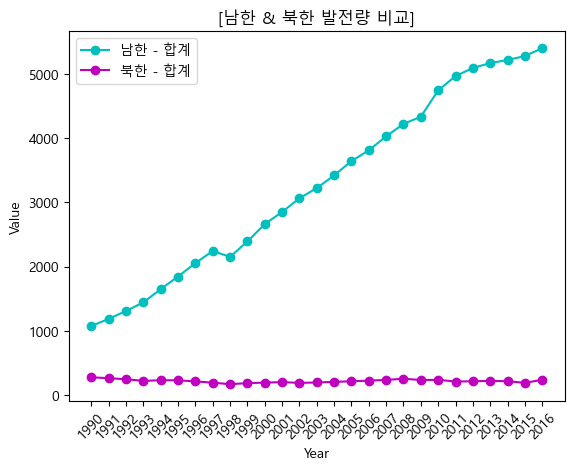

In [14]:
plt.plot(dataDF.loc[('남한','합계')],'co-',label='남한 - 합계')
plt.plot(dataDF.loc[('북한','합계')],'mo-',label='북한 - 합계')
plt.title('[남한 & 북한 발전량 비교]')
plt.ylabel('Value')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [15]:
def drawLineGraph(title,columns,labels,fmfs,xlabel,ylabel):
    for idx,col in enumerate(columns):
        plt.plot(dataDF.loc[col],fmfs[idx])
    plt.title(f'[{title}]')
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.xticks(rotation=45)
    plt.legend(labels)
    plt.show()

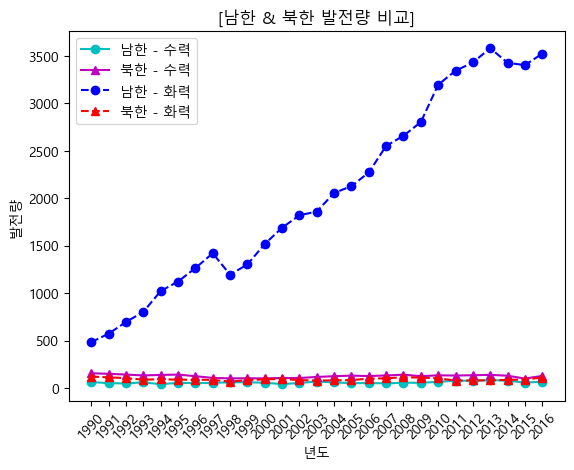

In [16]:
drawLineGraph('남한 & 북한 발전량 비교',[('남한','수력'),('북한','수력'),('남한','화력'),('북한','화력')],['남한 - 수력','북한 - 수력','남한 - 화력','북한 - 화력'],['co-','m^-','bo--','r^--'],'년도','발전량')

- 하나의 figuer에 여러게 그래프 넣기

In [17]:
# - figuer 객체 생성
# - 생성된 Figuer객체안에  subplot 객체 생성
#   * 그래프를 표시 방식 지정 : 가로 세로 몇개 그래프 넣을지 지정

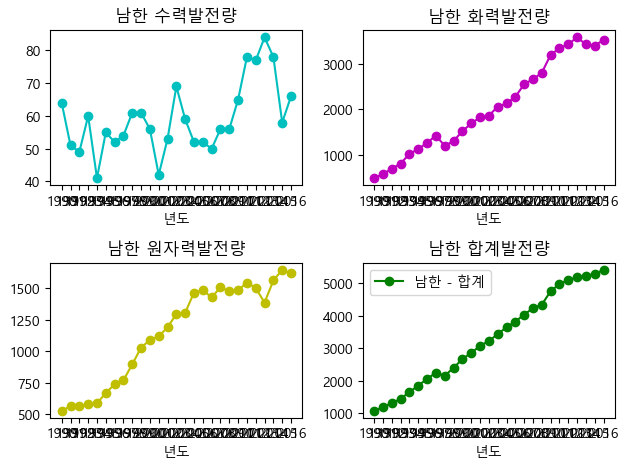

In [25]:
# -> 하나의 Figuer에서 수력/화력/원자력 합계 그래프 넣기
fig=plt.figure()
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)

ax1.plot(dataDF.loc[('남한','수력')],'co-',label='남한 - 수력')
ax2.plot(dataDF.loc[('남한','화력')],'mo-',label='남한 - 화력')
ax3.plot(dataDF.loc[('남한','원자력')],'yo-',label='남한 - 원자력')
ax4.plot(dataDF.loc[('남한','합계')],'go-',label='남한 - 합계')

ax1.set_title('남한 수력발전량')
ax1.set_xlabel('년도')

ax2.set_title('남한 화력발전량')
ax2.set_xlabel('년도')

ax3.set_title('남한 원자력발전량')
ax3.set_xlabel('년도')

ax4.set_title('남한 합계발전량')
ax4.set_xlabel('년도')

plt.tight_layout()
plt.legend()
plt.show()

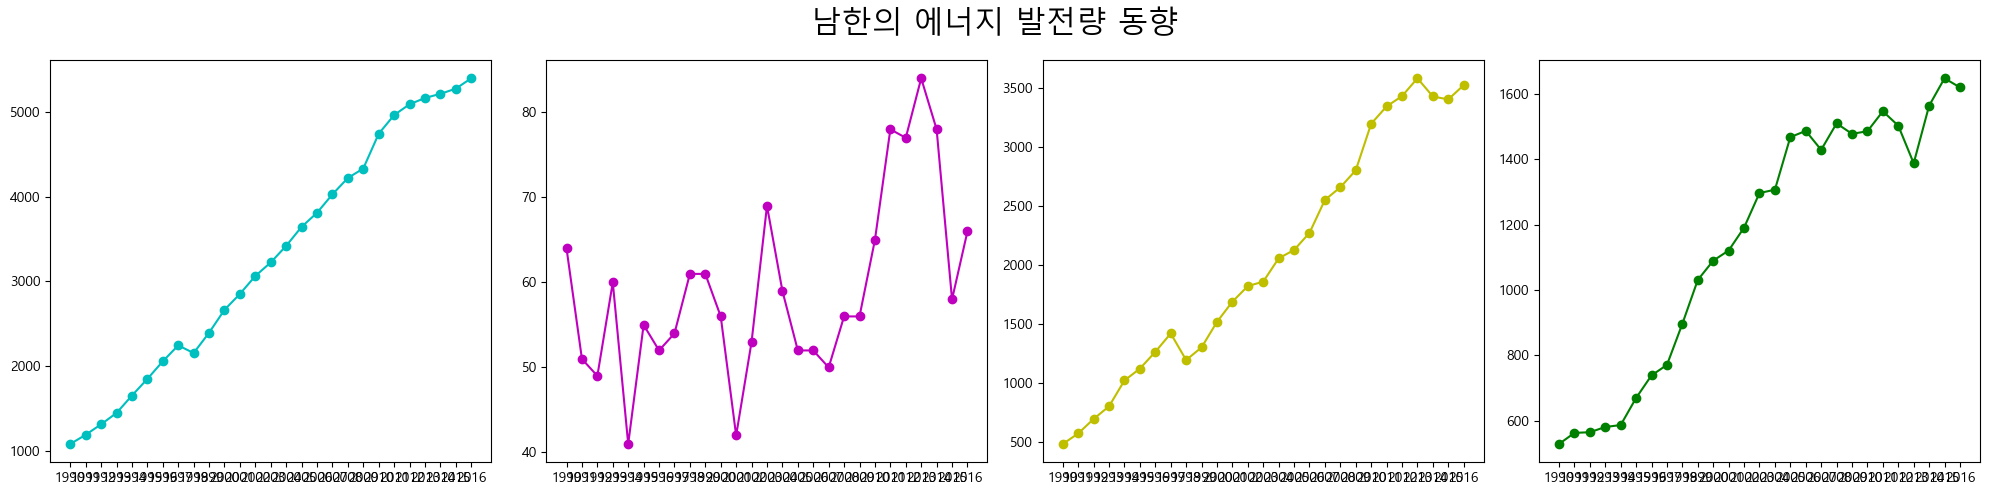

In [49]:
fig=plt.figure(figsize=(20,5))
# subplot : axes 객체를 배열에 담아서 반환
axes=fig.subplots(1,4)

# subplot에 그레프넣기
datas=dataDF.index.to_list()[:4]
fmfs=['co-','mo-','yo-','go-']
for idx,i in enumerate(axes):
    i.plot(dataDF.loc[datas[idx]],fmfs[idx])
# 전체 창 즉, figuer 설정
fig.suptitle('남한의 에너지 발전량 동향',fontsize=22)
plt.tight_layout()
plt.show()